## 다중선형회귀분석

- #### CRIM, RM, LSTAT 세개 변수가  PRICE 에 영향을 주는지 확인
    - Boston 주택 가격데이터 이용

[참고]

- boston data가 datasets 에서 삭제가 되었습니다.
- 데이터를 url을 통해 불러와 실습하겠습니다.
- 영상과 데이터를 불러오는 방식은 다르지만 동일한 데이터이니 큰 문제가 되지는 않을겁니다.
- culumn 명이 소문자이니 주의하세요.
- 강의자료에는 수정해 넣어두었습니다. 참고바랍니다.

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
import statsmodels.api as sm

In [5]:
# boston 데이터 불러오기
# url 이용
url='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
boston = pd.read_csv(url)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# boston 데이터의 column 명 확인
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
# target 변수인 medv를 price 로 변경
boston_df=boston.rename(columns={"medv":"price"})
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
x_data = boston_df[['crim', 'rm', 'lstat']]
x_data.head()

,crim,rm,lstat
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [9]:
price = boston_df[['price']]

In [10]:
x_data1 = sm.add_constant(x_data, has_constant='add')

In [11]:
multi_model = sm.OLS(price, x_data1)
fitted_multi_model = multi_model.fit()

In [12]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.01e-112
Time:                        06:07:18   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
crim          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
rm             5.2170      0.442     11.802      0.000       4.348       6.085
lstat         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 단순선형회귀모델의 회귀계수와 비교

In [15]:
price = boston_df[['price']]
crim = boston_df[['crim']]

In [16]:
crim1 = sm.add_constant(crim, has_constant='add')

In [17]:
model1 = sm.OLS(price, crim1)
fitted_model1 = model1.fit()

In [19]:
print(fitted_model1.params)

const    24.033106
crim     -0.415190
dtype: float64


In [20]:
print(fitted_multi_model.params)

const   -2.562251
crim    -0.102941
rm       5.216955
lstat   -0.578486
dtype: float64


- #### 시각화

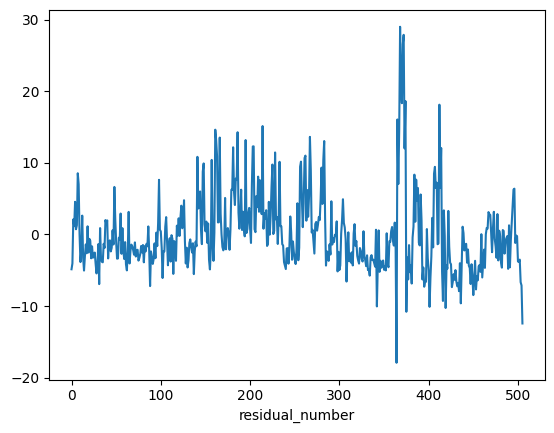

In [21]:
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

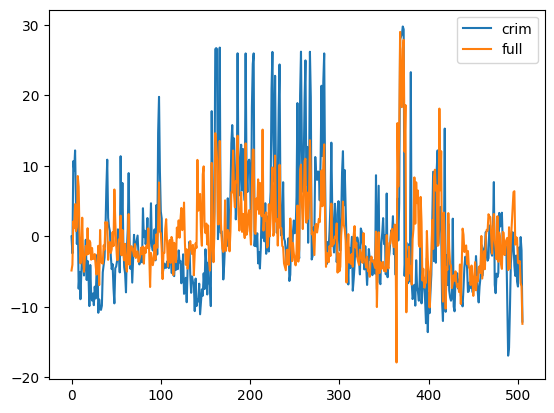

In [22]:
fitted_model1.resid.plot(label='crim')
fitted_multi_model.resid.plot(label='full')
plt.legend()

###  2. CRIM, RM, LSTAT 세개 변수로 다중선형회귀 적합한 결과와  각각의 변수를 단순선형회귀 적합한 모델의 회귀계수를 비교

- Boston 주택 가격데이터 이용

In [ ]:
# boston 데이터 불러오기
# url 이용
url='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
boston = pd.read_csv(url)
boston.head()

In [ ]:
# boston 데이터의 column 명 확인
boston.columns

In [ ]:
# target 변수인 medv를 price 로 변경
boston_df=boston.rename(columns={"medv":"price"})
boston_df.head()

- #### 상관계수/산점도를 통해 다중공선성 확인

In [23]:
x_data.corr()

,crim,rm,lstat
crim,1.000000,-0.219247,0.455621
rm,-0.219247,1.000000,-0.613808
lstat,0.455621,-0.613808,1.000000


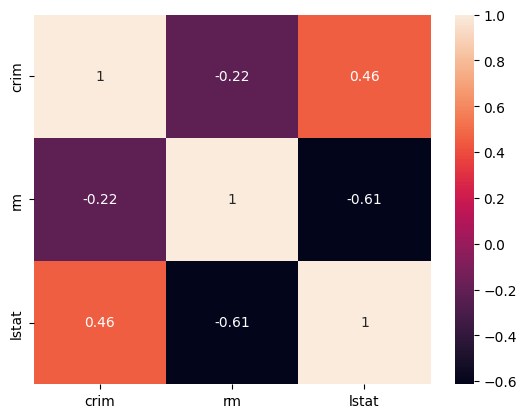

In [26]:
import seaborn as sns
sns.heatmap(x_data.corr(), annot=True)
plt.show()

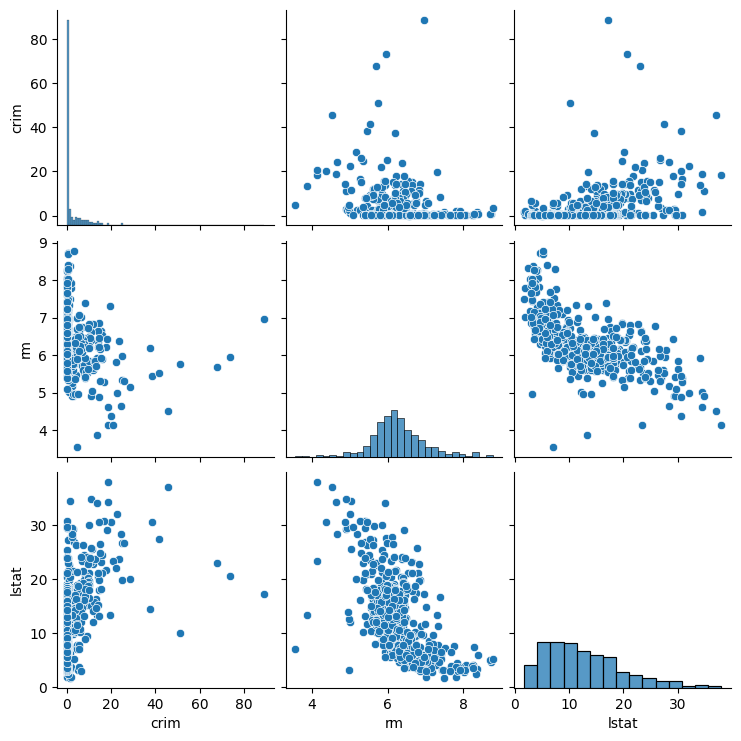

In [27]:
sns.pairplot(x_data)
plt.show()

- #### VIF를 통한 다중공선성 확인

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif factor'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif['feature'] = x_data.columns
vif

,vif factor,feature
0,1.475257,crim
1,3.379490,rm
2,4.167763,lstat


In [32]:
vif = pd.DataFrame()
x_data2 = x_data.drop('lstat', axis=1)
vif['vif factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,vif factor,features
0,1.151584,crim
1,1.151584,rm


In [33]:
x_data3 = sm.add_constant(x_data2, has_constant='add')
model_vif = sm.OLS(price, x_data3)
fitted_model_vif=model_vif.fit()

In [34]:
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           5.22e-86
Time:                        06:31:28   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
crim          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
rm             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 학습 / 검증데이터 분할

In [35]:
from sklearn.model_selection import train_test_split

X = x_data
y = price
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [36]:
x_train2 = sm.add_constant(x_train, has_constant='add')
fit_1 = sm.OLS(y_train, x_train2)
fit_1 = fit_1.fit()

In [37]:
x_test2 = sm.add_constant(x_test, has_constant='add')

fit_1.predict(x_test2)

404     5.439925
302    26.379176
465    18.944288
278    27.196242
295    28.757754
         ...    
8       9.191039
459    19.858532
165    23.326341
461    21.778478
476    19.799286
Length: 152, dtype: float64

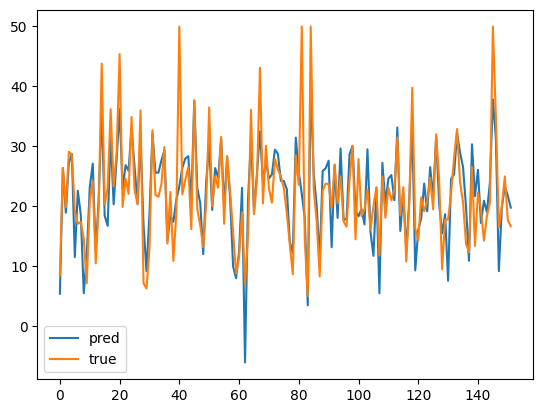

In [38]:
plt.plot(np.array(fit_1.predict(x_test2)), label='pred')
plt.plot(np.array(y_test), label='true')
plt.legend()
plt.show()

- #### MSE를 통한 검증데이터에 대한 성능비교

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(y_true = y_test['price'], y_pred=fit_1.predict(x_test2))

28.05204389950631